In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

## Polynomial Regression

In [4]:
# Load the dataset
df7 = pd.read_csv("car_price_dataset.csv")
print(df7.columns)
print(df7.head())

numeric_features7 = df7.select_dtypes(include=[np.number]).columns.tolist()
categorical_features7 = df7.select_dtypes(include=[object]).columns.tolist()

# Correct target column name
target_column7 = "Price"  # Updated to match the dataset

# Remove target column from numeric features
if target_column7 in numeric_features7:
    numeric_features7.remove(target_column7)

# Handle missing values
df7 = df7.dropna()

In [6]:
preprocessor7 = ColumnTransformer([
    ("num7", StandardScaler(), numeric_features7),
    ("cat7", OneHotEncoder(handle_unknown="ignore"), categorical_features7)
])

# Create polynomial features (degree 2)
poly7 = PolynomialFeatures(degree=2, include_bias=False)

In [8]:
def build_model(degree):
    return Pipeline([
        ("preprocessor7", preprocessor7),
        ("poly7", PolynomialFeatures(degree=degree, include_bias=False)),
        ("regressor7", LinearRegression())
    ])

# Split the dataset
X7 = df7.drop(columns=[target_column7])
y7 = df7[target_column7]
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.2, random_state=42)

In [10]:
# Define hyperparameter grid
param_grid7 = {'poly7__degree': [1, 2, 3]}  # Testing degrees 1 to 5

# Use GridSearchCV to find the best degree
grid_search7 = GridSearchCV(build_model(2), param_grid7, cv=5, scoring="neg_mean_absolute_error")
grid_search7.fit(X7_train, y7_train)

# Get the best degree
best_degree7 = grid_search7.best_params_['poly7__degree']
print(f"Best Polynomial Degree: {best_degree7}")

# Train the best model
best_model7 = build_model(best_degree7)
best_model7.fit(X7_train, y7_train)

# Evaluate
y7_pred = best_model7.predict(X7_test)
r2_7 = r2_score(y7_test, y7_pred)
mae7 = mean_absolute_error(y7_test, y7_pred)
rmse7 = np.sqrt(mean_squared_error(y7_test, y7_pred))

print(f"Tuned Polynomial Regression Performance:")
print(f"Best Polynomial Degree: {best_degree7}")
print(f"R² Score: {r2_7:.4f}")
print(f"Mean Absolute Error (MAE): {mae7:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse7:.2f}")

Best Polynomial Degree: 1
Tuned Polynomial Regression Performance:
Best Polynomial Degree: 1
R² Score: 0.9995
Mean Absolute Error (MAE): 20.00
Root Mean Squared Error (RMSE): 64.91


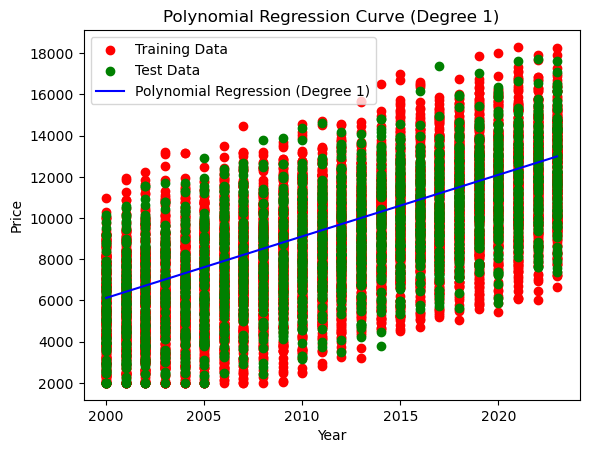

In [12]:
# Select a numerical feature for visualization
feature_name7 = numeric_features7[0]  # Choose a feature for plotting

# Generate smooth X values for visualization
X7_smooth = np.linspace(X7_train[feature_name7].min(), X7_train[feature_name7].max(), 100).reshape(-1, 1)

# Create DataFrame with all required columns
X7_smooth_df = pd.DataFrame(np.zeros((100, X7_train.shape[1])), columns=X7_train.columns)

# Assign smooth values to the selected numerical feature
X7_smooth_df[feature_name7] = X7_smooth.flatten()

# 🔹 Handle categorical columns properly
for col in categorical_features7:
    most_common_category = X7_train[col].mode()[0]  # Get most frequent category
    X7_smooth_df[col] = most_common_category  # Assign it to all rows

# Convert categorical columns to string type (if not already)
X7_smooth_df[categorical_features7] = X7_smooth_df[categorical_features7].astype(str)

# Apply preprocessing (transform all features)
X7_smooth_transformed = best_model7.named_steps["preprocessor7"].transform(X7_smooth_df)

# Apply polynomial transformation
X7_smooth_poly = best_model7.named_steps["poly7"].transform(X7_smooth_transformed)

# Predict using trained model
y7_smooth_pred = best_model7.named_steps["regressor7"].predict(X7_smooth_poly)

# Plot the data points and regression curve
plt.scatter(X7_train[feature_name7], y7_train, color='red', label="Training Data")  # Scatter plot of real data
plt.scatter(X7_test[feature_name7], y7_test, color='green', label="Test Data")  # Scatter plot of test data
plt.plot(X7_smooth, y7_smooth_pred, color='blue', label=f"Polynomial Regression (Degree {best_degree7})")

plt.xlabel(feature_name7)
plt.ylabel(target_column7)
plt.title(f"Polynomial Regression Curve (Degree {best_degree7})")
plt.legend()
plt.show()


## XG Boost

In [14]:
!pip install xgboost
from xgboost import XGBRegressor

sns.set_palette("husl")
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10, 6)

# Load dataset
df3 = pd.read_csv("car_price_dataset.csv")

# Set seaborn style for professional visualization
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)

# Load dataset
file_path = "car_price_dataset.csv"
df3 = pd.read_csv(file_path)

# Define features and target variable
target_column = "Price"
X3 = df3.drop(columns=[target_column])
y3 = df3[target_column]

# Identify categorical and numerical columns
categorical_features3 = ["Brand", "Model", "Fuel_Type", "Transmission"]
numerical_features3 = ["Year", "Engine_Size", "Mileage", "Doors", "Owner_Count"]

# Data preprocessing
preprocessor3 = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features3),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features3),
    ]
)

# Split dataset
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Define XGBoost model with pipeline
model3 = Pipeline([
    ("preprocessor", preprocessor3),
    ("regressor", XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42))
])

# Train the model
model3.fit(X_train3, y_train3)

# Make predictions
y_pred3 = model3.predict(X_test3)

# Evaluate performance
mse3 = mean_squared_error(y_test3, y_pred3)
r2_3 = r2_score(y_test3, y_pred3)

print(f" R² Score: {r2_3:.4f}")

rmse3 = np.sqrt(mse3)  # Assuming mse3 is already defined in your notebook
print(f"Root Mean Squared Error (RMSE): {rmse3:.2f}")


from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Get predictions
y_train_pred3 = model3.predict(X_train3)
y_test_pred3 = model3.predict(X_test3)

# Compute R² scores
train_r2_3 = r2_score(y_train3, y_train_pred3)
test_r2_3 = r2_score(y_test3, y_test_pred3)

# Compute RMSE
train_rmse_3 = np.sqrt(mean_squared_error(y_train3, y_train_pred3))
test_rmse_3 = np.sqrt(mean_squared_error(y_test3, y_test_pred3))

print(f"Train R²: {train_r2_3:.4f}, Test R²: {test_r2_3:.4f}")
print(f"Train RMSE: {train_rmse_3:.2f}, Test RMSE: {test_rmse_3:.2f}")

residuals3 = y_test3 - y_test_pred3


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
 R² Score: 0.9960
Root Mean Squared Error (RMSE): 191.31
Train R²: 0.9976, Test R²: 0.9960
Train RMSE: 153.28, Test RMSE: 191.31


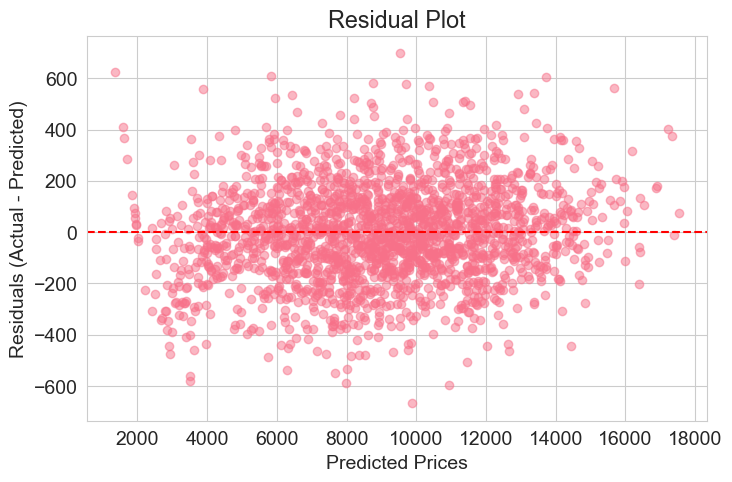

In [16]:
# Get predictions
y_train_pred3 = model3.predict(X_train3)
y_test_pred3 = model3.predict(X_test3)

# Compute R² scores
train_r2_3 = r2_score(y_train3, y_train_pred3)
test_r2_3 = r2_score(y_test3, y_test_pred3)

# Compute RMSE
train_rmse_3 = np.sqrt(mean_squared_error(y_train3, y_train_pred3))
test_rmse_3 = np.sqrt(mean_squared_error(y_test3, y_test_pred3))


residuals3 = y_test3 - y_test_pred3

plt.figure(figsize=(8, 5))
plt.scatter(y_test_pred3, residuals3, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

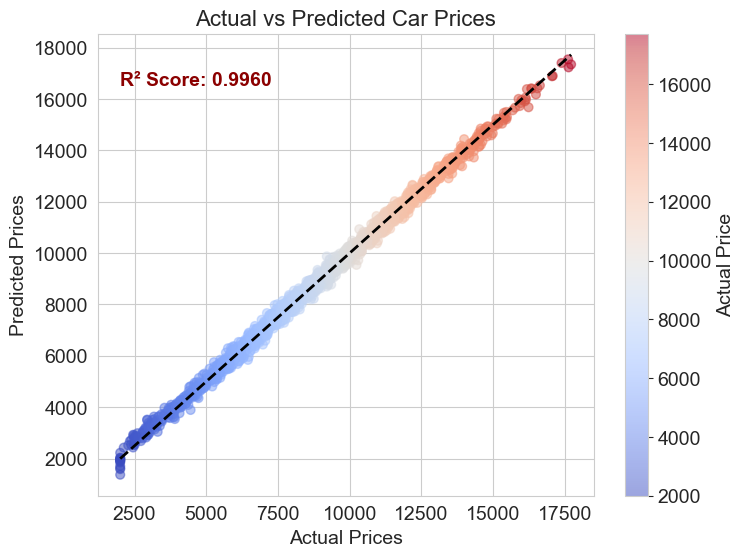

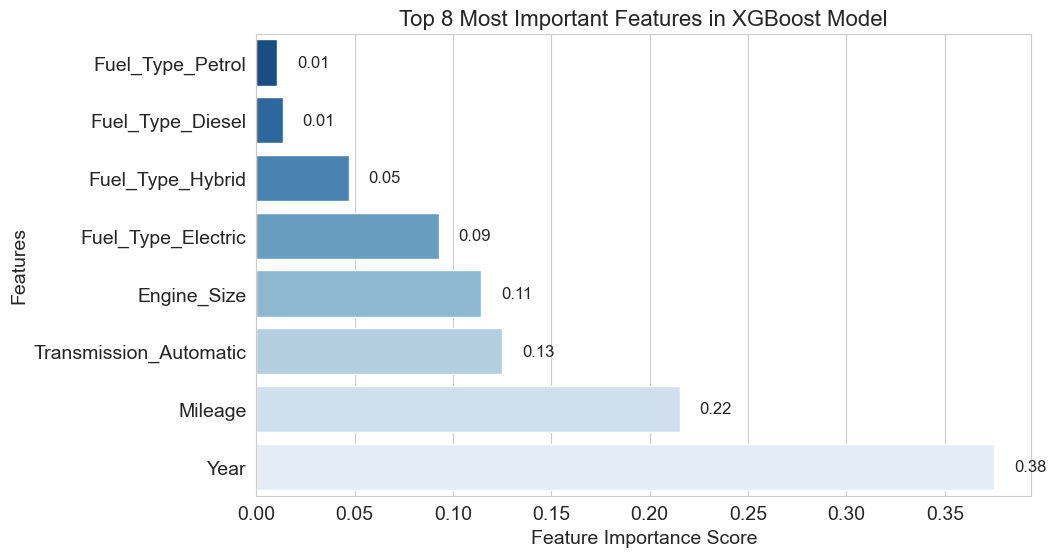

In [18]:
# Actual vs. Predicted Scatter Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(y_test3, y_pred3, alpha=0.5, c=y_test3, cmap="coolwarm", s=40)  # Gradient color based on actual price
plt.plot([min(y_test3), max(y_test3)], [min(y_test3), max(y_test3)], '--k', linewidth=2)  # Black reference line
plt.colorbar(scatter, label="Actual Price")  # Show price gradient scale
plt.xlabel("Actual Prices", fontsize=14)
plt.ylabel("Predicted Prices", fontsize=14)
plt.title("Actual vs Predicted Car Prices", fontsize=16)
plt.annotate(f"R² Score: {r2_3:.4f}", xy=(min(y_test3), max(y_pred3) - 1000), fontsize=14, color="darkred", fontweight="bold")  # Adjust annotation position
plt.show()

# Feature Importance 
xgb_model = model3.named_steps["regressor"]
feature_names3 = numerical_features3 + list(model3.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out())

# Extract feature importance from the trained model
feature_importance3 = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importance3)[-8:]  # Get top 8 features

# Final Feature Importance Plot 
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=feature_importance3[sorted_idx], 
    y=np.array(feature_names3)[sorted_idx], 
    palette=sns.color_palette("Blues_r", n_colors=len(sorted_idx)),
    orient="h"
)
plt.xlabel("Feature Importance Score", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Top 8 Most Important Features in XGBoost Model", fontsize=16)

# Add data labels on bars
for i, value in enumerate(feature_importance3[sorted_idx]):
    ax.text(value + 0.01, i, f"{value:.2f}", fontsize=12, verticalalignment="center")

plt.show()

## SVR model

In [20]:
df2 = pd.read_csv('car_price_dataset.csv')

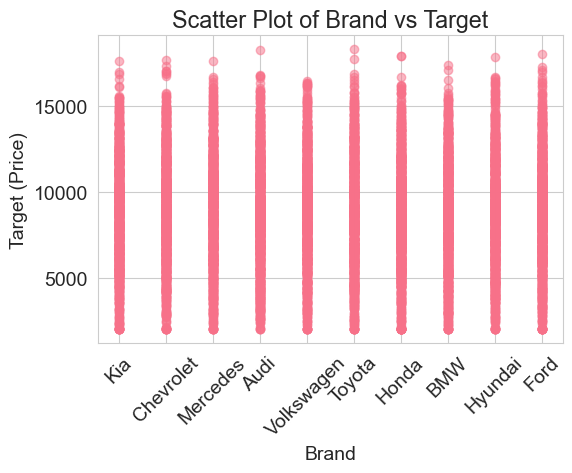

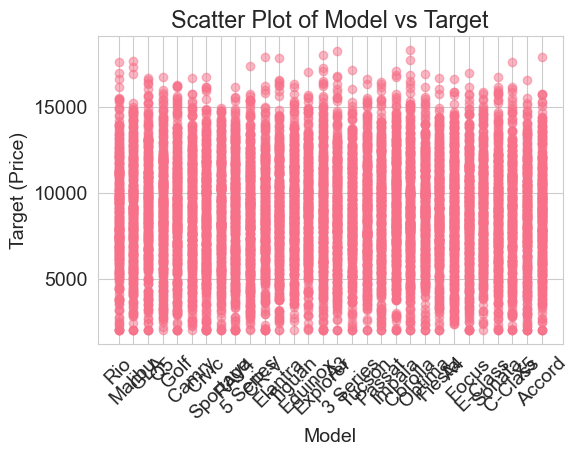

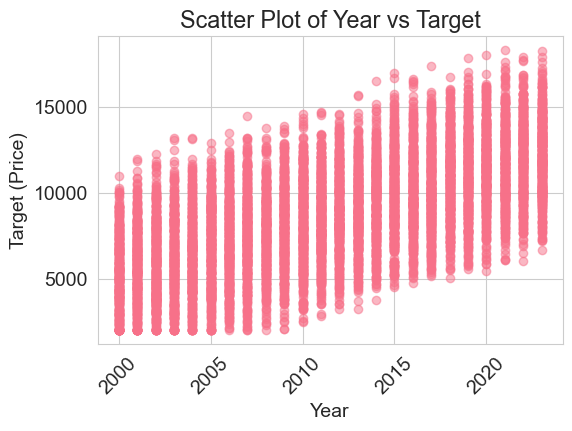

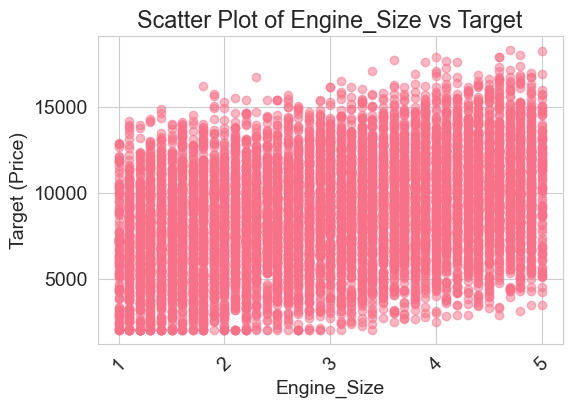

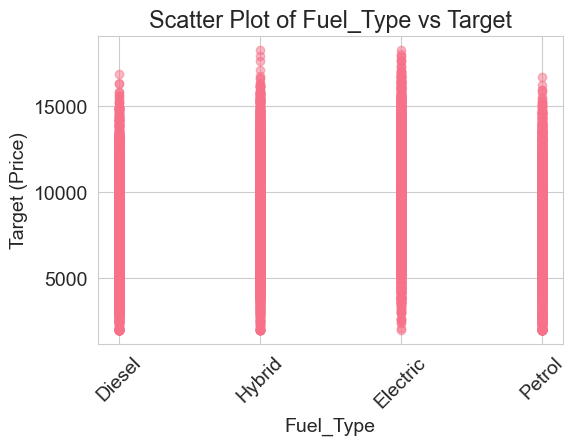

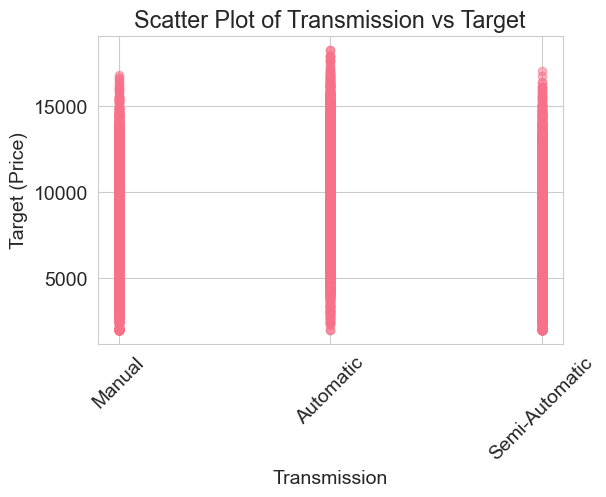

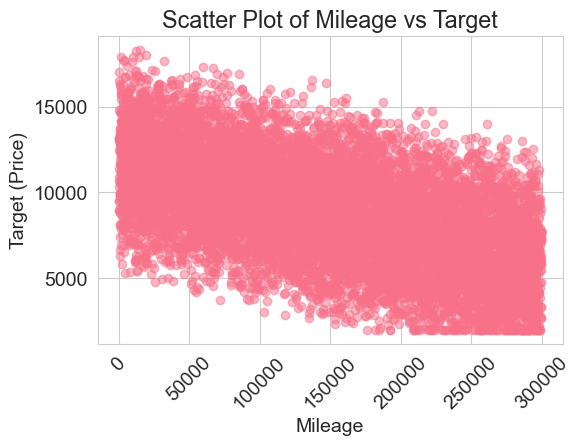

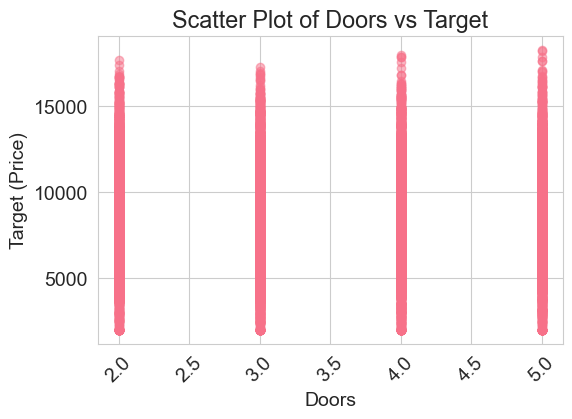

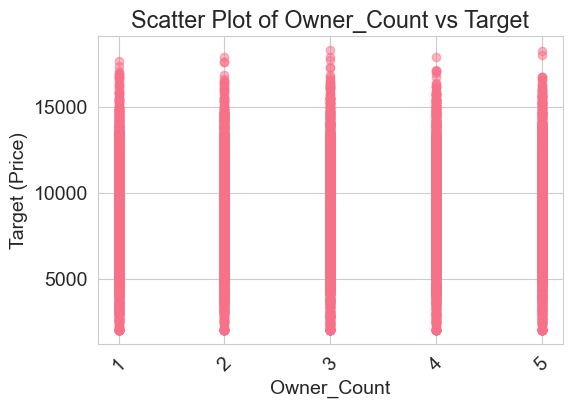

In [22]:
X2 = df2.drop('Price', axis=1)
y2 = df2['Price']

for column in X2.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(X2[column], y2, alpha=0.5)
    plt.xticks(rotation=45)
    plt.xlabel(column)
    plt.ylabel('Target (Price)')
    plt.title(f'Scatter Plot of {column} vs Target')
    plt.show()


In [24]:
# Train-test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Preprocessing for numerical and categorical features
numeric_features2 = ['Year', 'Mileage', 'Engine_Size', 'Doors', 'Owner_Count']
categorical_features2 = ['Brand', 'Model', 'Fuel_Type', 'Transmission']

numeric_transformer2 = StandardScaler()
categorical_transformer2 = OneHotEncoder(handle_unknown='ignore')

preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer2, numeric_features2),
        ('cat', categorical_transformer2, categorical_features2)
    ])

# Combine preprocessing with model pipeline
pipeline2 = Pipeline(steps=[('preprocessor', preprocessor2),
                            ('model', SVR(kernel='rbf', C=1.0, gamma=0.1, epsilon=0.01))])

In [26]:
# Fit the pipeline
pipeline2.fit(X_train2, y_train2)

# Make predictions
y_pred2 = pipeline2.predict(X_test2)

# Evaluate the model
mae2 = mean_absolute_error(y_test2, y_pred2)
rmse2 = np.sqrt(mean_squared_error(y_test2, y_pred2))
r2_2 = r2_score(y_test2, y_pred2)

print("Support Vector Regression Performance")
print(f"Root Mean Square Error: {rmse2}")
print(f"Mean Absolute Error: {mae2}")
print(f"R² Score: {r2_2}") 

# These results are with the default parameters

Support Vector Regression Performance
Root Mean Square Error: 2809.18092161087
Mean Absolute Error: 2279.9072764199495
R² Score: 0.1410906557209528


In [28]:
# Define parameter grid
param_grid2 = {
    'model__C': [0.1, 1, 10, 100],
    'model__gamma': [0.01, 0.1, 1],
    'model__epsilon': [0.01, 0.1, 0.5]
}

# Perform GridSearchCV
grid_search2 = GridSearchCV(pipeline2, param_grid2, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search2.fit(X_train2, y_train2)

# Best parameters and score
print("Best Parameters:", grid_search2.best_params_)
print("Best CV Score:", grid_search2.best_score_)

# Use the best estimator for predictions
best_model2 = grid_search2.best_estimator_
y_pred_grid2 = best_model2.predict(X_test2)

# Evaluate the best model
mae_grid2 = mean_absolute_error(y_test2, y_pred_grid2)
rmse_grid2 = np.sqrt(mean_squared_error(y_test2, y_pred_grid2))
r2_grid2 = r2_score(y_test2, y_pred_grid2)

print(f"Grid Search SVR MAE: {mae_grid2}")
print(f"Grid Search SVR RMSE: {rmse_grid2}")
print(f"Grid Search SVR R²: {r2_grid2}")

# results with tuned hyper parameters

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'model__C': 100, 'model__epsilon': 0.01, 'model__gamma': 0.01}
Best CV Score: 0.9990359235586121
Grid Search SVR MAE: 44.784623504056725
Grid Search SVR RMSE: 81.54393448923139
Grid Search SVR R²: 0.9992762789049809


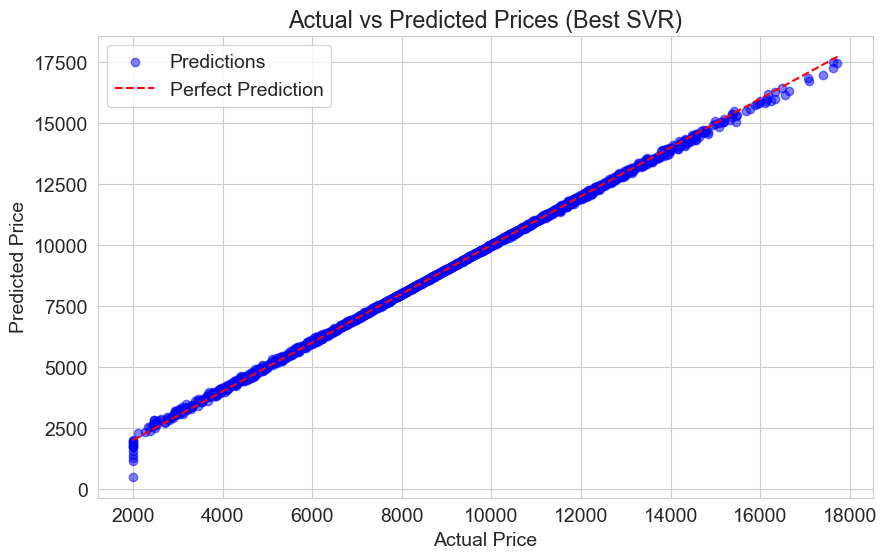

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test2, y_pred_grid2, color='blue', alpha=0.5, label='Predictions')
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Best SVR)')
plt.legend()
plt.show()

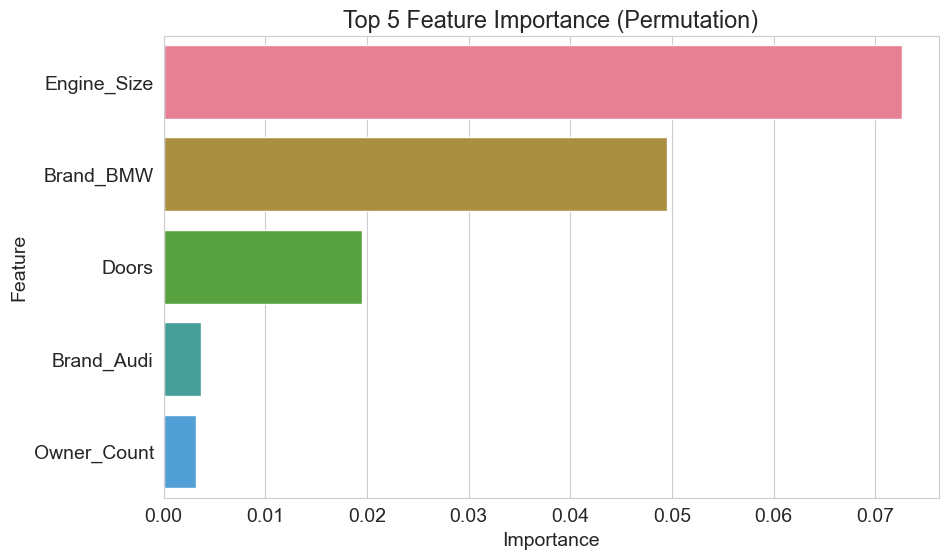

In [32]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
result2 = permutation_importance(pipeline2, X_test2, y_test2, n_repeats=10, random_state=42)

# Get feature importance and feature names
importances2 = result2.importances_mean
all_features2 = numeric_features2 + list(
    pipeline2.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features2)
)

min_length2 = min(len(all_features2), len(importances2))
all_features2 = all_features2[:min_length2]
importances2 = importances2[:min_length2]

# Create a DataFrame for feature importance
feature_importance_df2 = pd.DataFrame({'Feature': all_features2, 'Importance': importances2})

# Sort by importance and get top 5 features
top_5_features2 = feature_importance_df2.sort_values(by='Importance', ascending=False).head(5)

# Plot top 5 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_5_features2)
plt.title('Top 5 Feature Importance (Permutation)')
plt.show()

## Random Forrest


Training RandomForest ...

Feature Importances:
                        Feature  Importance
2                       Mileage    0.318823
0                          Year    0.310087
1                   Engine_Size    0.143836
5                        CarAge    0.108085
17           Fuel_Type_Electric    0.049239
20       Transmission_Automatic    0.048063
18             Fuel_Type_Hybrid    0.010383
4                   Owner_Count    0.001903
19             Fuel_Type_Petrol    0.001724
16             Fuel_Type_Diesel    0.001566
3                         Doors    0.001564
10                  Brand_Honda    0.000461
8               Brand_Chevrolet    0.000451
7                     Brand_BMW    0.000431
22  Transmission_Semi-Automatic    0.000414
6                    Brand_Audi    0.000409
21          Transmission_Manual    0.000396
15             Brand_Volkswagen    0.000383
14                 Brand_Toyota    0.000379
12                    Brand_Kia    0.000370
9                    Brand_

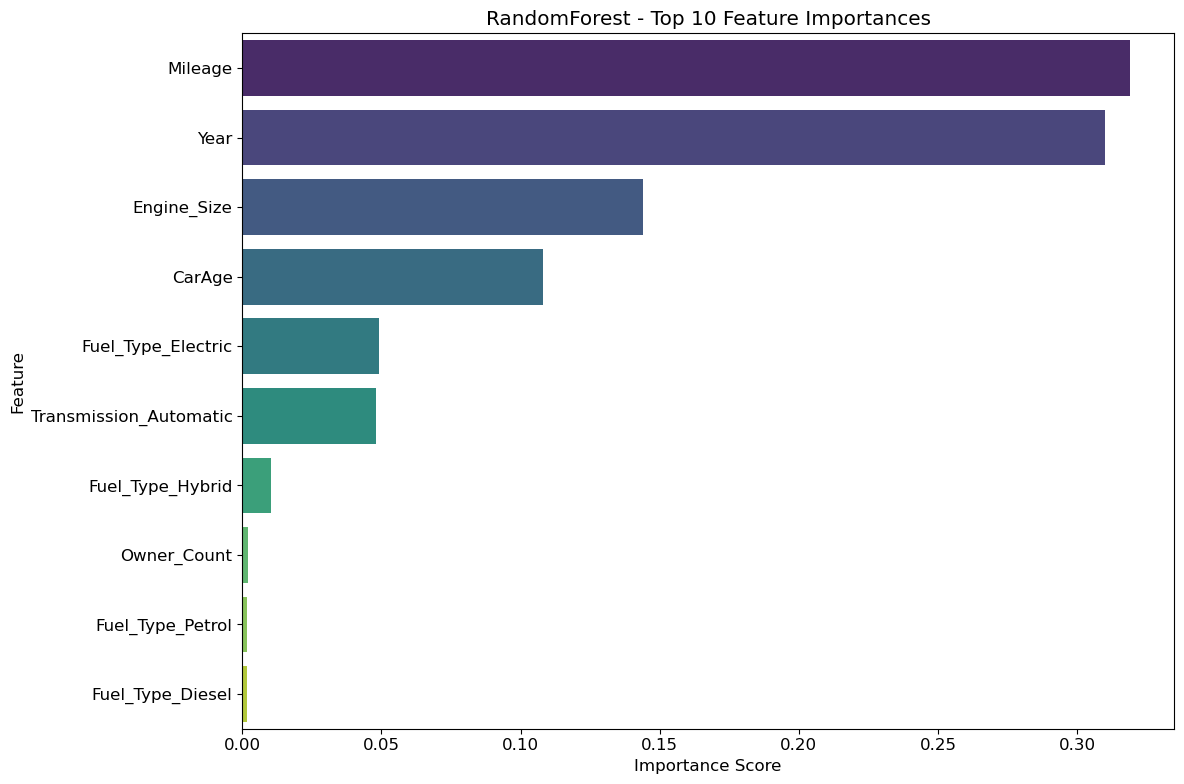


Final Results:
          Model        RMSE         MAE        R²
0  RandomForest  315.822559  246.446794  0.989144


In [4]:
sns.set_palette("husl")
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10, 6)


df = pd.read_csv("car_price_dataset.csv")


current_year = 2023
df['CarAge'] = current_year - df['Year']


df.drop('Model', axis=1, inplace=True)


df['Price'] = np.log1p(df['Price'])


X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numeric_features = ['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'CarAge']
categorical_features = ['Brand', 'Fuel_Type', 'Transmission']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),       
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  
    ])


model_config = {
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'model__n_estimators': [100, 300, 500],  
            'model__max_depth': [10, 20, 30, None],  
            'model__min_samples_split': [2, 5, 10],  
        }
    }
}


results = []

for model_name, config in model_config.items():
    print(f"\nTraining {model_name} ...")
    
    
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', config['model'])
    ])
    
    
    grid = GridSearchCV(
        pipe,
        param_grid=config['params'],
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    grid.fit(X_train, y_train)
    
    
    best_model = grid.best_estimator_
    
    
    y_pred = best_model.predict(X_test)
    
  
    y_test_exp = np.expm1(y_test)
    y_pred_exp = np.expm1(y_pred)
    
   
    rmse = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
    mae = mean_absolute_error(y_test_exp, y_pred_exp)
    r2 = r2_score(y_test_exp, y_pred_exp)
    
   
    results.append({
        'Model': model_name,
        'Best Params': str(grid.best_params_),
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    })

    
    feature_importances = best_model.named_steps['model'].feature_importances_

   
    numeric_feature_names = numeric_features
    
    
    ohe = best_model.named_steps['preprocessor'].named_transformers_['cat']
    categorical_feature_names = ohe.get_feature_names_out(categorical_features)
    
    
    all_feature_names = np.concatenate([numeric_feature_names, categorical_feature_names])

    
    importance_df = pd.DataFrame({
        'Feature': all_feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    
    print("\nFeature Importances:")
    print(importance_df)

  
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
    plt.title(f'{model_name} - Top 10 Feature Importances')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()


results_df = pd.DataFrame(results)
print("\nFinal Results:")
print(results_df[['Model', 'RMSE', 'MAE', 'R²']])

In [6]:
mse = mean_squared_error(y_test_exp, y_pred_exp) 
mae = mean_absolute_error(y_test_exp, y_pred_exp)  

print("\nRandom Forest Regression performance:")
print(f"Mean Absolute Error: {mae:.6f}")
print(f"Root Mean Squared Error: {rmse:.6f}")
print(f"R² Score: {r2:.6f}")


Random Forest Regression performance:
Mean Absolute Error: 246.446794
Root Mean Squared Error: 315.822559
R² Score: 0.989144


In [8]:
print(best_model)
best_params = grid.best_params_
print("\nBest Parameters:", best_params)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Engine_Size',
                                                   'Mileage', 'Doors',
                                                   'Owner_Count', 'CarAge']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Brand', 'Fuel_Type',
                                                   'Transmission'])])),
                ('model',
                 RandomForestRegressor(max_depth=30, n_estimators=500,
                                       random_state=42))])

Best Parameters: {'model__max_depth': 30, 'model__min_samples_split': 2, 'model__n_estimators': 500}


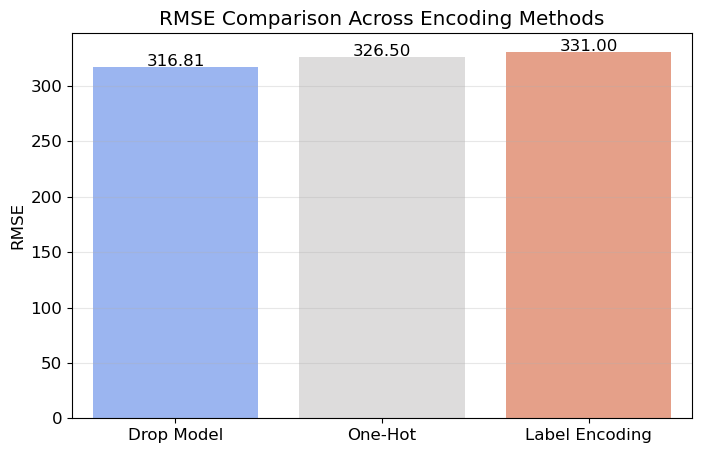

In [10]:
encoding_methods = ["Drop Model", "One-Hot", "Label Encoding"]
rmse_values = [316.81, 326.50, 331.00]


plt.figure(figsize=(8, 5))
sns.barplot(x=encoding_methods, y=rmse_values, palette="coolwarm")
plt.ylabel("RMSE")
plt.title("RMSE Comparison Across Encoding Methods")
plt.grid(axis="y", alpha=0.3)

for i, v in enumerate(rmse_values):
    plt.text(i, v + 1, f"{v:.2f}", ha="center", fontsize=12)

plt.show()


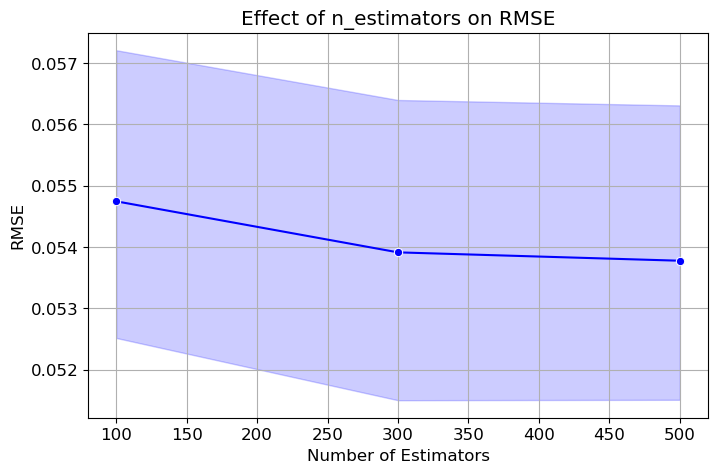

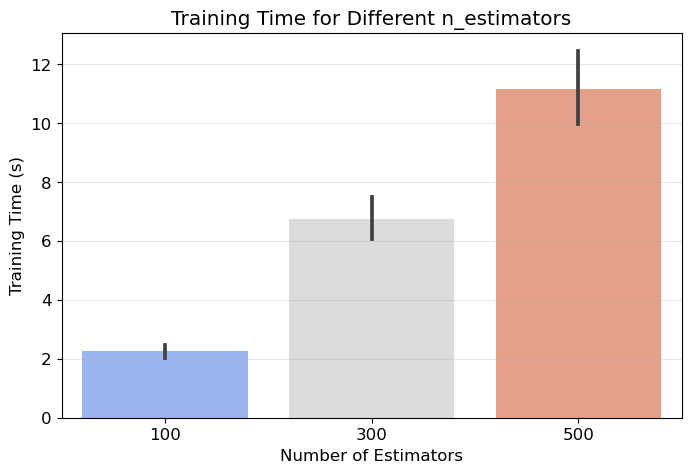

In [12]:
cv_results = pd.DataFrame(grid.cv_results_)
cv_results["RMSE"] = np.sqrt(-cv_results["mean_test_score"])


train_time_results = cv_results[["param_model__n_estimators", "mean_fit_time"]]

plt.figure(figsize=(8, 5))
sns.lineplot(x=cv_results["param_model__n_estimators"], y=cv_results["RMSE"], marker="o", color="b")
plt.xlabel("Number of Estimators")
plt.ylabel("RMSE")
plt.title("Effect of n_estimators on RMSE")
plt.grid()
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x=train_time_results["param_model__n_estimators"], y=train_time_results["mean_fit_time"], palette="coolwarm")
plt.xlabel("Number of Estimators")
plt.ylabel("Training Time (s)")
plt.title("Training Time for Different n_estimators")
plt.grid(axis="y", alpha=0.3)
plt.show()

# using anything more than 500 estimators is too computationally expensive and doesn't improve the model 